<a href="https://colab.research.google.com/github/Lucas20santos/Python/blob/master/Modelando_Sistema_Bancario_POO_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Criando um sistema bancário

## Dasafio

Atualizar a implementação do sistema bancário, para armazenar os dados de clientes e contas bancárias em objetos ao invés de dicionários. O código deve seguir o modelo de classes UML a seguir:

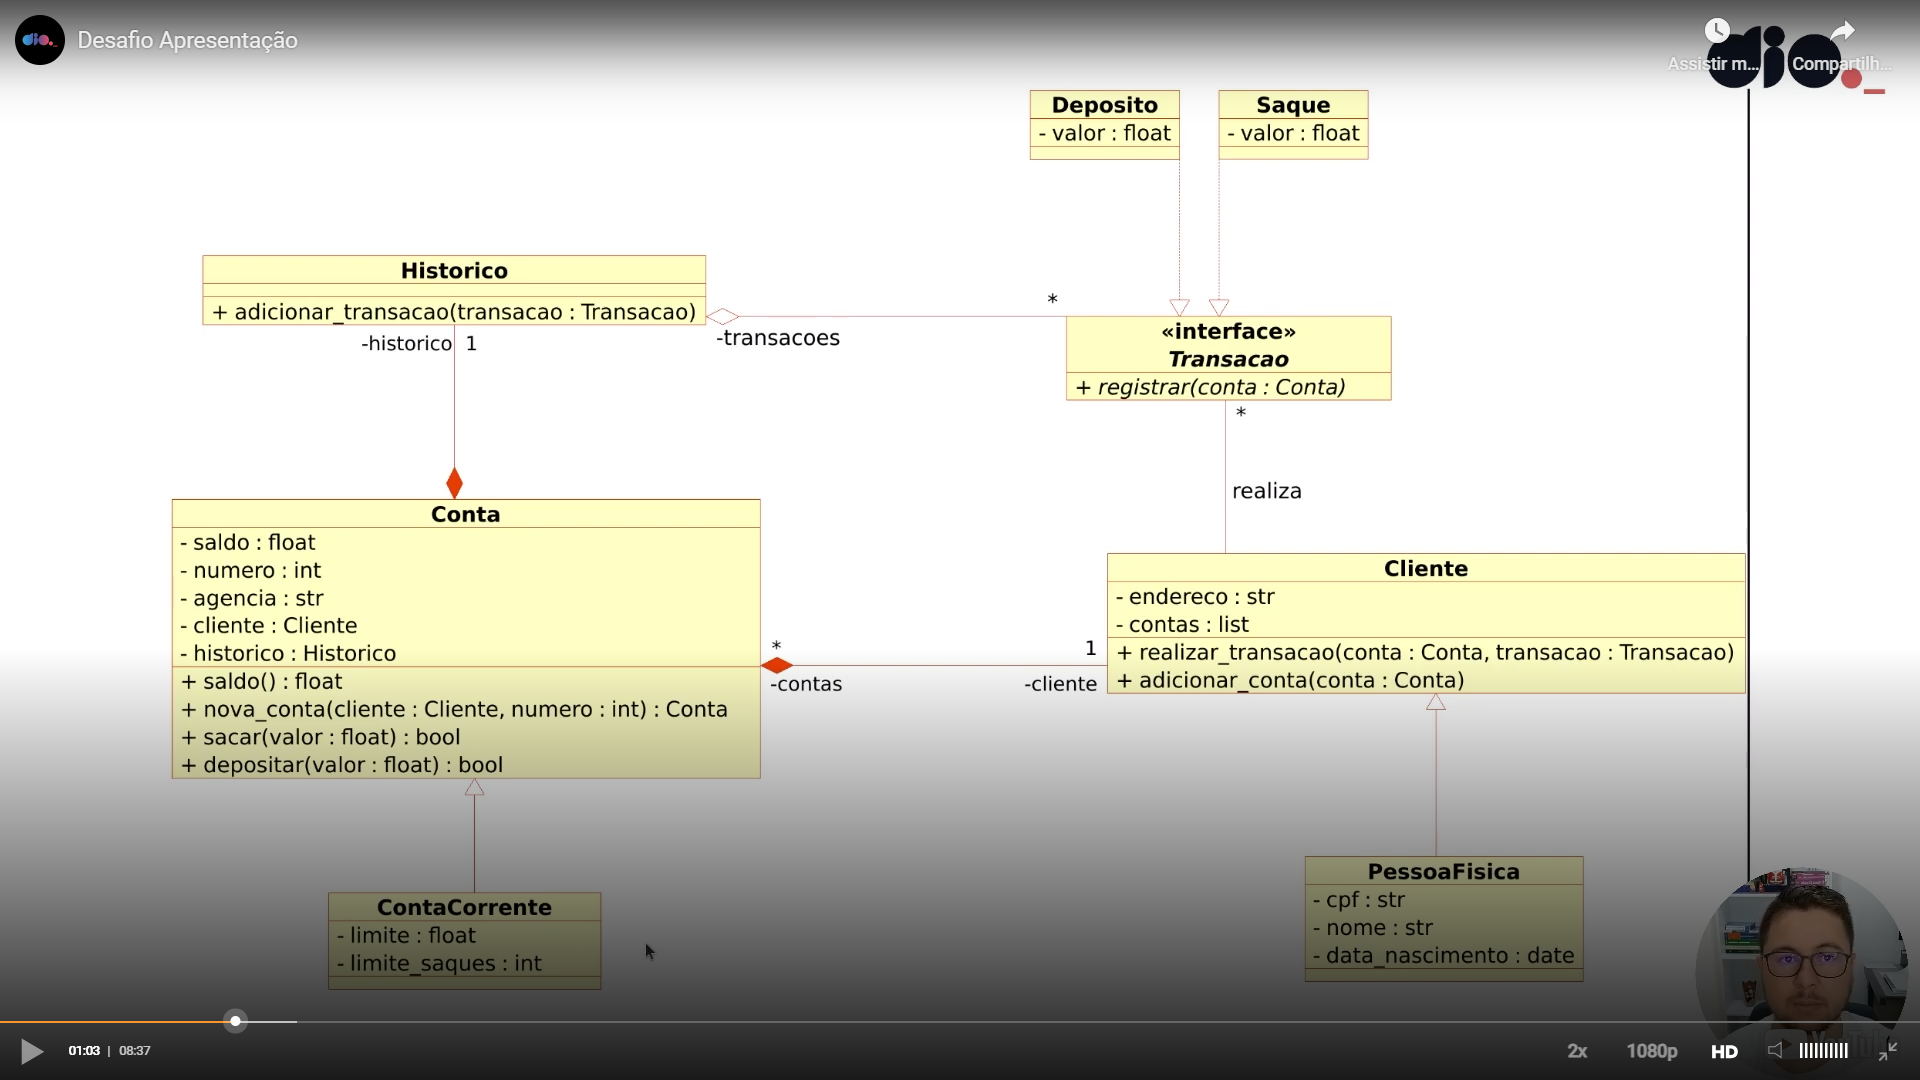



## Desafio extra

Após concluir a modelagem das classes e a criação dos métodos. Atualizar os métodos que tratam as opões do menu, para funcionarem com as classes modeladas.


In [15]:
def menu():
  menu = """\n
  ===================== MENU ==========================
  [d]\tDepositar
  [s]\tSacar
  [e]\tExtrato
  [nc]\tNova Conta
  [lc]\tListar Contas
  [nu]\tNovo usuário
  [q]\tSair
  """
  return input(textwrap.dedent(menu))

def main():
  clientes = []
  contas = []

  while True:
    opcao = menu()

    if opcao == "d":
      depositar(clientes)

    elif opcao == "s":
      exibir_extrato(clientes)

    elif opcao == "nu":
      criar_cliente(clientes)

    elif opcao == "nc":
      numero_conta = len(contas) + 1
      listar_conta(numero_conta, clientes, contas)

    elif opcao == "lc":
      listar_contas(contas)

    elif opcao == "q":
      break

    else:
      print("\n@@@ Operação inválida, por favor selecione novamente a operação desejada. @@@")


In [ ]:
import textwrap

def filtrar_cliente(cpf, clientes):
  clientes_filtrados = [cliente for cliente in clientes if cliente.cpf == cpf]
  return clientes_filtrados[0] if clientes_filtrados else None


In [ ]:
def recuperar_conta_cliente(cliente):
  if not cliente.contas:
    print("\n@@@@ Cliente não possui conta! @@@")
    return

  # FIXME: não permite cliente escolher a conta
  return cliente.contas[0]

In [ ]:
def depositar(clientes):
  cpf = input("Informe o CPF do cliente: ")
  cliente = filtrar_cliente(cpf, clientes)

  if not cliente:
    print("\n@@@ Cliente não encotrado! @@@")
    return

  valor = float(input("Informe o valor do deposito: "))

  transacao = Deposito(valor)

  conta = recuperar_conta_cliente(cliente)
  if not conta:
    return

  cliente.realizar_transacao(conta, transacao)

In [16]:
def sacar(clientes):
  cpf = input("Informe o CPF do cliente: ")
  cliente = filtrar_cliente(cpf, clientes)

  if not cliente:
    print("\n@@@@ Cliente não encotrado! @@@@")
    return

  valor = float(input("Informe o valor do saque: "))
  transacao = Saque(valor)

  conta = recuperar_conta_cliente(cliente)
  if not conta:
    return

  cliente.realizar_transacao(conta, transacao)

In [ ]:
def exibir_extrato(clientes):
  cpf = input("Informe o CPF do cliente: ")
  cliente = filtrar_cliente(cpf, clientes)

  if not cliente:
    print("\n@@@ Cliente naõ encotrado! @@@")
    return

  conta = recuperar_conta_cliente(cliente)
  if not conta:
    return

  print("\n========================== EXTRATO ===========================")
  transacoes = conta.historico.transacoes

  extrato = ""
  if not transacoes:
    extrato = "Não foram realizadas movimentações."

  else:
    for transacao in transacoes:
      extrato += f"\n{transacao['tipo']}:\n\tR$ {transacao['valor']:.2f}"

  print(extrato)
  print(f"\nSaldo:\n\tR$ {conta.saldo:.2f}")
  print("==================================================================")


In [ ]:
def criar_cliente(clientes):
  cpf = input("Informe o CPF (somente número): ")
  cliente = filtrar_cliente(cpf, clientes)

  if cliente:
    print("\n@@@ Jão existe cliente com esse CPF! @@@@")
    return

  nome = input("Informe o nome completo: ")
  data_nascimento = input("Informe a data de nascimento (dd-mm-aaaa): ")
  endereco = input("Informe o endereço (logradouro, nro - bairro - cidade/sigla estado): ")

  clientes.append(cliente)

  print("\n==== Cliente criado com sucesso! ====")

In [ ]:
def criar_conta(numero_conta, clientes, contas):
  cpf = input("Informe o CPF do cliente: ")
  cliente = filtrar_cliente(cpf, clientes)

  if not cliente:
    print("\n@@@@ Cliente não encontrado, fluxo de criação de conta encerrado! @@@@")
    return

  conta = contaCorrente.nova_conta(cliente=cliente, numero=numero_conta)
  contas.append(conta)
  cliente.contas.append(conta)

  print("\n=== Conta criada com sucesso! ===")

In [ ]:
def listar_contas(contas):
  for conta in contas:
    print("=" * 100)
    print(textwrap.dedent(str(conta)))

In [3]:
from datetime import datetime

class PessoaFisica(Cliente):
  def __init__(self, nome: str, data_nascimento: datetime, cpf: str, endereco) -> None:
    super().__init__(endereco)
    self._cpf = cpf
    self.data_nascimento = data_nascimento
    self.nome = nome


NameError: name 'Cliente' is not defined

In [ ]:
class Conta():
  def __init__(self, numero, cliente) -> None:
    self._saldo = 0
    self._numero = numero
    self._agencia = "0001"
    self._cliente = cliente
    self._historico = Historico()

  @classmethod
  def nova_conta(cls, cliente, numero):
    return cls(numero, cliente)

  @property
  def numero(self):
    return self._saldo

  @property
  def agencia(self):
    return self._agencia


  @property
  def cliente(self):
    return self._cliente


  @property
  def historico(self):
    return self._historico


  def sacar(self, valor):
    saldo = self.saldo
    excedeu_saldo = valor > saldo

    if excedeu_saldo:
      print('\nOperação falhou! Voc~e não tem saldo suficiente')

    elif valor > 0:
      self.saldo -= valor
      print("\nSaque realizado com sucesso!")
      return True

    else:
      print("\nOperação falhou! O valor informado é invalido.")

    return False

  def depositar(self, valor):
    if valor > 0:
      self._saldo += valor
      print("\n Deposito realizado com sucesso.")

    else:
      print("\nOperação falhou! O valor informado é inválido.")

In [ ]:
class contaCorrente(Conta):
  def __init__(self, numero, cliente, limite = 500, limite_saque = 3) -> None:
    super().__init__(numero, cliente)
    self._limite = limite
    self._limite_saldo = limite_saque


  def sacar(self, valor):
    numero_saques = len(
        [transacao for transacao in self.historico
         .transacoes if transacao["tipo"] == Saque.__name__]
    )

    excedeu_limite = valor > self.limite
    excedeu_saques = numero_saques > self.limite_saques

    if excedeu_limite:
      print("\nOperacao falhou! O valor do Saque excede o limite")

    elif excedeu_saques:
      print("\nOperação falho! Numero máximo de saques excedido.")

    else:
      return super().sacar(valor)

    return False

  def __str__(self) -> str:
    return f"""
          Agência: \t{self.agencia}
          C/C:\t\t{self.numero}
          Titular:\t{self.cliente.nome}
    """


In [2]:
class Cliente(PessoaFisica):
  def __init__(self, cpf: str, data_nascimento: datetime, endereco: str, conta: Conta) -> None:
    super().__init__(cpf, data_nascimento)
    self.endereco = endereco
    self.contas = []

  def realizar_transacao(self, conta, transacao):
    transacao.registrar(conta)

  def adicionar_conta(self, conta):
    self.contas.append(conta)

NameError: name 'PessoaFisica' is not defined

In [ ]:
class Historico():
  def __init__(self):
    self._trasacoes = []

  @property
  def transacoes(self):
    return self._trasacoes

  def adicioanr_transacao(self, transacao):
    self._trasacoes.append(
        {
            "tipo": transacao.__class__.__name__,
            "valor": transacao.valor,
            "data": datetime.now().strftime("%d-%m-%Y %H:%M:%s")
        }
    )

In [14]:
from abc import ABC, abstractmethod, abstractproperty, abstractclassmethod

class Transacao(ABC):
  @property
  @abstractproperty
  def valor(self):
    pass

  @abstractclassmethod
  def registrar(self, conta):
    pass

class Deposito():
  def __init__(self, valor) -> None:
    self._valor = valor

  @property
  def valor(self):
    return self._valor

  def registrar(self, conta):
    sucesso_transacao = conta.depositar(self.valor)

    if sucesso_transacao:
      conta.historico.adicioanr_transacao(self)

class Saque():
  def __init__(self, valor) -> None:
    self._valor = valor

  @property
  def valor(self):
    return self._valor

  def registrar(self, conta):
    sucesso_transacao = conta.sacar(self.valor)

    if sucesso_transacao:
      conta.historico.adicioanr_transacao(self)

